# Artificial Neural Networks AM41AN

## Week 6 Cybenko's approximation

## Task 1

For a continuous function $f:[a,b]\to\mathbb{R}$, find the Cybenko approximation with $M$ terms:
$$
g_M(x)=f(a)+\sum_{i=1}^M\left[f(x_i)-f(x_{i-1})\right]\sigma\left(K(x-t_{i-1})\right),
$$
where
$$
x_i=a+i\frac{b-a}M\qquad\forall\,0\leq i\leq M,
$$
and $t_i=\frac{x_{i+1}+x_i}2$ for all $0\leq i<M$.
Consider different values of $0<K$ and different sigmoidal functions $\sigma$.



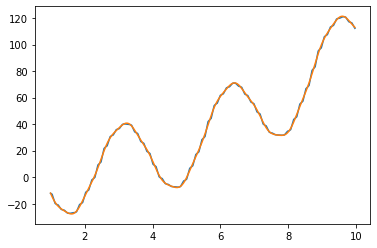

In [110]:
##############
### Task 1 ###
##############

import numpy as np                              # Imports the libraries
import matplotlib.pyplot as plt  

def function(x):                                # Continuous function being approached
    return  np.sin(10 * x) + 30 * np.cos(2 * x) + x ** 2

def sig(x):                                     # Current sigmoidal function
#    return  (1 + np.sign(x)) / 2 
    return   1 / (1 + np.exp(-x))

def vectors(a,b,M):                            # Function that computs the grid points and mid-grid points
    xi = np.zeros(M + 1)                       # grid in x
    fi = np.zeros(M + 1)                       # grid in f(x)
    ti = np.zeros(M + 1)                       # mid-grid in x
    Dx = (b - a) / M                           # delta x
    for i in range(M):                         # calculation of each point
        xi[i] = a + i * Dx
        fi[i] = function(xi[i])
        ti[i] = a + (i + 0.5) * Dx
    xi[M] = b                                  # last point
    fi[M] = function(b)                        # last point
    return(xi,fi,ti)

def g(a,b,M,K,x,xj,fj,tj):                     # implementation of Cybenko's approximation in 1-d
    gg = fj[0]                                 # initial constant
    for i in range(1 , M + 1):                 # loop over the grid
        gg = gg + (fj[i] - fj[i - 1]) * sig(K * (x - tj[i-1]))
    return gg 

def approx(a,b,M,K,L):                         # uses Cybenko's approximation to compute the curve in [a,b]
    xx = np.arange(a,b,(b-a)/L)                # plotting grid on x
    aa = np.zeros(len(xx))                     # approximation to the curve
    bb = np.zeros(len(xx))                     # curve
    xv , fv , tv = vectors(a,b,M)              # computation of the grid parameters
    for i in range(len(xx)):                   # application of the approximation over all plotting grid points
        aa[i] = g(a,b,M,K,xx[i],xv,fv,tv)
        bb[i] = function(xx[i]) 
    plt.plot(xx,aa)                            # plots
    plt.plot(xx,bb)
    plt.show()
    
approx(1,10,50,50,200)

    
    

## Task 2

For a continuous function $f:[a,b]\times[c,d]\to\mathbb{R}$, find the Cybenko approximation with $M^2$ terms:
$$
g_{M^2}(x,y)=f(a,c)+\sum_{i=1}^M\left[f(x_i,c)-f(x_{i-1},c)\right]\sigma\left(K(x-t_{i-1})\right)+\\
+\sum_{j=1}^M\left[f(a,y_j)-f(a,y_{j-1},c)\right]\sigma\left(K(y-s_{j-1})\right)+\\
+\sum_{i=1}^M\sum_{j=1}^M\left[f(x_i,y_j)-f(x_i-1,y_j)-f(x_i,y_{j-1}+f(x_{i-1},y_{j-1})\right]\sigma\left(K(x-t_{i-1})\right)\sigma\left(K(y-s_{j-1})\right),
$$
where
$$
x_i=a+i\frac{b-a}M\qquad\forall\,0\leq i\leq M\\
y_j=c+j\frac{d-c}M\qquad\forall\,0\leq j\leq M
$$
and $t_i=\frac{x_{i+1}+x_i}2$ for all $0\leq i<M$ and $s_j=\frac{y_{j+1}+y_j}2$ for all $0\leq j<M$.
Consider different values of $0<K$ and different sigmoidal functions $\sigma$.



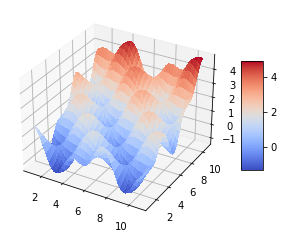

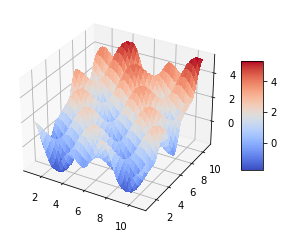

In [132]:
##############
### Task 2 ###
##############

import numpy as np                              # Imports the libraries
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def function3D(x,y):                            # Continuous function being approached
    return  np.sin(x + y) + 1 * np.cos(2 * (x - y)) + 0.03 * x ** 2 + 0.02 * y

def sig(x):                                     # Current sigmoidal function
#    return  (1 + np.sign(x)) / 2 
    return   1 / (1 + np.exp(-x))

def vectors3D(a,b,c,d,M):                       # Function that computs the grid points and mid-grid points
    xi = np.zeros(M + 1)                        # grid in x
    yi = np.zeros(M + 1)                        # grid in y
    fi = np.zeros((M + 1 , M + 1))              # grid in f(x,y)
    ti = np.zeros(M + 1)                        # mid-grid in x
    si = np.zeros(M + 1)                        # mid-grid in y
    Dx = (b - a) / M                            # delta x
    Dy = (d - c) / M                            # delta y
    for i in range(M):                          # calculation of each point
        xi[i] = a + i * Dx
        yi[i] = c + i * Dy
        ti[i] = a + (i + 0.5) * Dx
        si[i] = c + (i + 0.5) * Dy
    xi[M] = b                                   # calculation of last point
    yi[M] = d
    for i in range(M + 1):
        for j in range(M + 1):
            fi[i,j] = function3D(xi[i],yi[j])   # calculation of the function over the grid
    return(xi,yi,fi,ti,si)

def g3D(M,K,x,y,fj,tj,sj):                      # Cybenko's approximation in 2-d
    gg = fj[0,0]                                # First point of the initial condition
    for i in range(1 , M + 1):                  # First line at y=c constant
        gg = gg + (fj[i,0] - fj[i - 1,0]) * sig(K * (x - tj[i-1]))
    for j in range(1 , M + 1):                  # First line at x=a constant
        gg = gg + (fj[0,j] - fj[0,j - 1]) * sig(K * (y - sj[j-1]))
    for i in range(1 , M + 1):                  # Double sum
        for j in range(1 , M + 1):
            gg = gg + (fj[i,j] - fj[i - 1,j] - fj[i,j - 1] + fj[i - 1,j - 1]) * sig(K * (x - tj[i-1])) * sig(K * (y - sj[j-1]))
    return(gg) 

def approx3D(a,b,c,d,M,K,L):                                   # Calculation of the Cybenko's Approximation on a plotting grid
    xx = np.arange(a,b,(b-a)/L)                                # grid parameters
    yy = np.arange(c,d,(d-c)/L)
    aa = np.zeros((len(xx),len(yy)))
    xv , yv , fv , tv , sv = vectors3D(a,b,c,d,M)              # Approximation parameters
    for i in range(len(xx)):                                   # Calculation
        for j in range(len(yy)):
            aa[i,j] = g3D(M,K,xx[i],yy[j],fv,tv,sv)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})    # 3D Plots
    xx , yy = np.meshgrid(xx,yy)
    surf = ax.plot_surface(xx, yy, aa, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()  

def ff(a,b,c,d,L):                                            # Plot of the function without approximation, for comparisson
    xx = np.arange(a,b,(b-a)/L)
    yy = np.arange(c,d,(d-c)/L)
    bb = np.zeros((len(xx),len(yy)))
    for i in range(len(xx)):
        for j in range(len(yy)):
            bb[i,j] = function3D(xx[i],yy[j]) 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})    
    xx , yy = np.meshgrid(xx,yy)
    surf = ax.plot_surface(xx, yy, bb, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()  
    
approx3D(1,11,1,11,50,5,40)

ff(1,11,1,11,40)


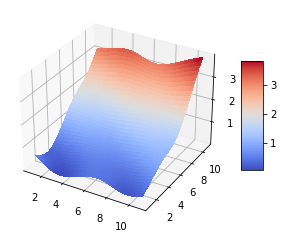

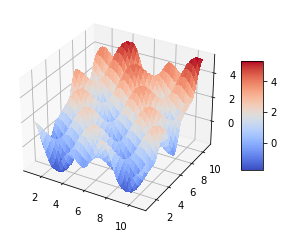

In [133]:
approx3D(1,11,1,11,50,1,40)

ff(1,11,1,11,40)